Project 1

Saeeda Aiyub Surti - 101537161

Deepta Lokanath Uchil - 101538545

This project aims to develop a deep learning model for classifying different types of brain tumors using image data. The dataset comprises MRI scans categorized into four classes: no tumor, glioma tumor, meningioma tumor, and pituitary tumor. The images are preprocessed to a uniform size and are fed into a convolutional neural network (CNN) for training. Various deep learning libraries, including TensorFlow and PyTorch, are utilized to construct, train, and evaluate the model.

The notebook covers the complete workflow from loading and preprocessing the image data to model training and evaluation. Data augmentation techniques are employed to enhance the model's generalization capability. The project leverages the keras-tuner library for hyperparameter tuning to optimize the model performance. Evaluation metrics such as accuracy are used to assess the model's effectiveness in correctly classifying the brain tumor images.

The primary aim of this project is to develop a robust and accurate deep learning model capable of classifying different types of brain tumors using MRI image data. Specifically, the model should be able to distinguish between four categories: no tumor, glioma tumor, meningioma tumor, and pituitary tumor. By leveraging advanced image processing techniques, convolutional neural networks (CNNs), and hyperparameter tuning, the project seeks to achieve high classification accuracy and generalization capability. This model can potentially assist medical professionals in diagnosing brain tumors more efficiently and accurately.

#Import libraries

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D
from tensorflow.keras.optimizers import Adam
from kerastuner import RandomSearch
import os
import numpy as np
import torch
import glob
import torch.nn as nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torchvision
import pathlib
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import torch
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD
import warnings
warnings.filterwarnings("ignore")

<ipython-input-4-4528556261de>:17: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading and Preprocessing Image Data

In [ ]:
import os
import cv2
import numpy as np

train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = '/content/drive/MyDrive/archive/Training'
path_test = '/content/drive/MyDrive/archive/Testing'
img_size = 300

def load_images_from_folder(folder, img_size, img_list, labels_list):
    for label_folder in os.listdir(folder):
        label_folder_path = os.path.join(folder, label_folder)
        if os.path.isdir(label_folder_path):
            for filename in os.listdir(label_folder_path):
                img_path = os.path.join(label_folder_path, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (img_size, img_size))
                    img_list.append(img)
                    labels_list.append(label_folder)

# Load training and testing images
load_images_from_folder(path_train, img_size, train_img, train_labels)
load_images_from_folder(path_test, img_size, test_img, test_labels)

# Convert lists to numpy arrays
train_img = np.array(train_img)
test_img = np.array(test_img)

# Encode labels
label_map = {'no_tumor': 0, 'glioma_tumor': 1, 'meningioma_tumor': 2, 'pituitary_tumor': 3}
train_labels_encoded = [label_map[label] for label in train_labels]
test_labels_encoded = [label_map[label] for label in test_labels]


In [ ]:
print("Shape of train: ",(train_img).shape," and shape of test: ", (test_img).shape)

Shape of train:  (2880, 300, 300, 3)  and shape of test:  (394, 300, 300, 3)


Data Augmentation

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

Splitting Data into Training and Testing Sets

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((2592, 300, 300, 3), (2592,), (288, 300, 300, 3), (288,))

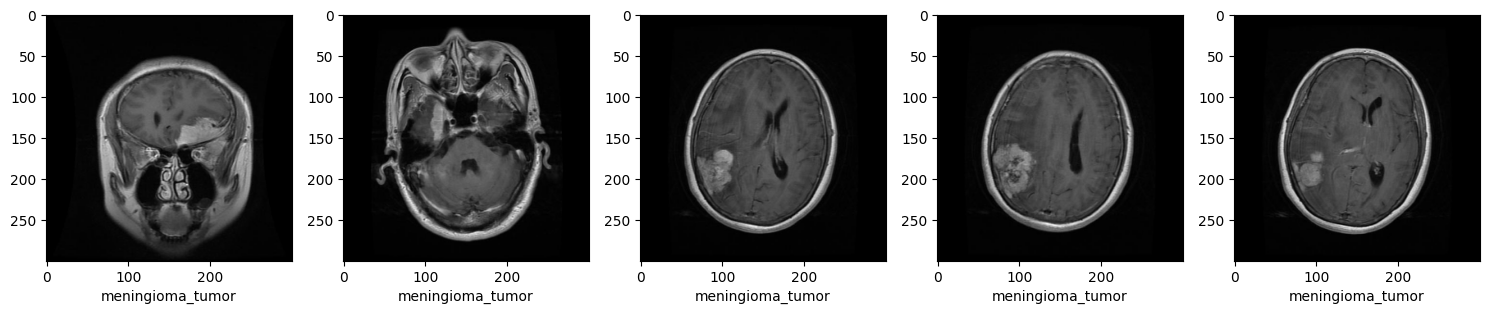

In [ ]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

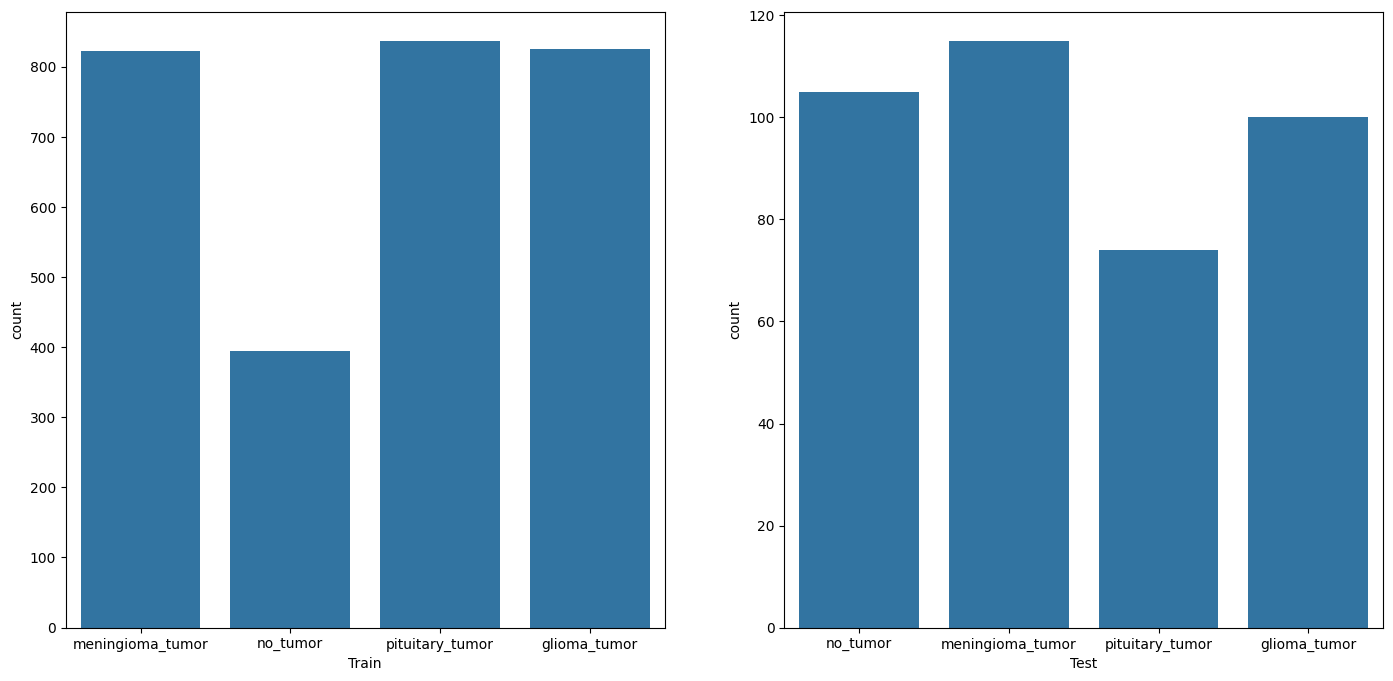

In [ ]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

Building the Convolutional Neural Network (CNN) Model and Compiling the Model

In [ ]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='sigmoid')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


Training the Model

In [ ]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)), validation_split=0.1, epochs =20, verbose=1, batch_size=32)

Epoch 1/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 474s 6s/step - accuracy: 0.4218 - loss: 9.0695 - val_accuracy: 0.0625 - val_loss: 1.0150
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 469s 6s/step - accuracy: 0.6342 - loss: 0.8492 - val_accuracy: 0.0174 - val_loss: 1.1229
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 490s 6s/step - accuracy: 0.6758 - loss: 0.7151 - val_accuracy: 0.8194 - val_loss: 0.5684
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 464s 6s/step - accuracy: 0.7440 - loss: 0.6179 - val_accuracy: 0.7292 - val_loss: 0.6860
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 457s 6s/step - accuracy: 0.8094 - loss: 0.4644 - val_accuracy: 0.7014 - val_loss: 0.6938
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 491s 6s/step - accuracy: 0.8252 - loss: 0.4288 - val_accuracy: 0.7153 - val_loss: 0.7127
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 456s 6s/step - accuracy: 0.8362 - loss: 0.3769 - val_accuracy: 0.8785 - val_loss: 0.3739
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 494s 6s/step - accuracy: 0.8760 - loss: 0.3057 - val_accuracy: 0.8646 - v

In [ ]:
model.layers[0].get_weights()[0].shape

(5, 5, 3, 32)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape


((2592, 300, 300, 3), (2592,), (288, 300, 300, 3), (288,))

In [ ]:
transforming_img = transforms.Compose([
    transforms.Resize((150,150)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.5,0.5,0.5],
                        [0.5,0.5,0.5])
])

In [ ]:
train_path = ('/content/drive/MyDrive/archive/Training')
test_path = ('/content/drive/MyDrive/archive/Testing')

train_loader=DataLoader(
    torchvision.datasets.ImageFolder(train_path,transform=transforming_img),
    batch_size=64, shuffle=True
)
test_loader=DataLoader(
    torchvision.datasets.ImageFolder(test_path,transform=transforming_img),
    batch_size=32, shuffle=True
)


#categories
root=pathlib.Path(train_path)
classes=sorted([j.name.split('/')[-1] for j in root.iterdir()])

In [ ]:
print(f'The classes are: {classes}')

The classes are: ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [ ]:
train_count=len(glob.glob(train_path+'/**/*.jpg'))
test_count=len(glob.glob(test_path+'/**/*.jpg'))

In [ ]:
class ConvNet(nn.Module):
    def __init__(self,num_classes=4):
        super(ConvNet,self).__init__()


        self.conv1=nn.Conv2d(in_channels=3, out_channels=12, kernel_size=3, stride=1, padding=1)

        self.bn1=nn.BatchNorm2d(num_features=12)
        self.relu1=nn.ReLU()
        self.pool=nn.MaxPool2d(kernel_size=2)
        self.conv2=nn.Conv2d(in_channels=12,out_channels=20,kernel_size=3,stride=1,padding=1)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(in_channels=20,out_channels=32,kernel_size=3,stride=1,padding=1)
        self.bn3=nn.BatchNorm2d(num_features=32)
        self.relu3=nn.ReLU()
        self.fc=nn.Linear(in_features=75 * 75 * 32,out_features=num_classes)



        #Feed forwad function

    def forward(self,input):
        output=self.conv1(input)
        output=self.bn1(output)
        output=self.relu1(output)
        output=self.pool(output)
        output=self.conv2(output)
        output=self.relu2(output)
        output=self.conv3(output)
        output=self.bn3(output)
        output=self.relu3(output)
        output=output.view(-1,32*75*75)
        output=self.fc(output)

        return output

model=ConvNet(num_classes=4).to(device)

In [ ]:
for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

In [ ]:
images.shape

torch.Size([64, 3, 150, 150])

In [ ]:
#Optmizer and loss function
optimizer=Adam(model.parameters(),lr=0.001,weight_decay=0.0001)
loss_function=nn.CrossEntropyLoss()



best_accuracy=0.0

for epoch in range(20):

    #Evaluation and training on training dataset
    model.train()
    train_accuracy=0.0
    train_loss=0.0

    for i, (images,labels) in enumerate(train_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

        optimizer.zero_grad()

        outputs=model(images)
        loss=loss_function(outputs,labels)
        loss.backward()
        optimizer.step()


        train_loss+= loss.cpu().data*images.size(0)
        _,prediction=torch.max(outputs.data,1)

        train_accuracy+=int(torch.sum(prediction==labels.data))

    train_accuracy=train_accuracy/train_count
    train_loss=train_loss/train_count


    # Evaluation on testing dataset
    model.eval()

    test_accuracy=0.0
    for i, (images,labels) in enumerate(test_loader):
        if torch.cuda.is_available():
            images=Variable(images.cuda())
            labels=Variable(labels.cuda())

        outputs=model(images)
        _,prediction=torch.max(outputs.data,1)
        test_accuracy+=int(torch.sum(prediction==labels.data))

    test_accuracy=test_accuracy/test_count


    print('Epoch: '+str(epoch)+' Train Loss: '+str(train_loss)+' Train Accuracy: '+str(train_accuracy)+' Test Accuracy: '+str(test_accuracy))

    if test_accuracy>best_accuracy:
        torch.save(model.state_dict(),'best_checkpoint.model')
        best_accuracy=test_accuracy

Epoch: 0 Train Loss: tensor(6.4392) Train Accuracy: 0.5961805555555556 Test Accuracy: 0.3680203045685279
Epoch: 1 Train Loss: tensor(1.3098) Train Accuracy: 0.78125 Test Accuracy: 0.5583756345177665
Epoch: 2 Train Loss: tensor(0.9497) Train Accuracy: 0.8350694444444444 Test Accuracy: 0.6370558375634517
Epoch: 3 Train Loss: tensor(0.4855) Train Accuracy: 0.9003472222222222 Test Accuracy: 0.6370558375634517
Epoch: 4 Train Loss: tensor(0.3341) Train Accuracy: 0.9222222222222223 Test Accuracy: 0.6751269035532995
Epoch: 5 Train Loss: tensor(0.2188) Train Accuracy: 0.9447916666666667 Test Accuracy: 0.6421319796954315
Epoch: 6 Train Loss: tensor(0.2033) Train Accuracy: 0.9538194444444444 Test Accuracy: 0.6624365482233503
Epoch: 7 Train Loss: tensor(0.1351) Train Accuracy: 0.9649305555555555 Test Accuracy: 0.6700507614213198
Epoch: 8 Train Loss: tensor(0.4884) Train Accuracy: 0.9128472222222223 Test Accuracy: 0.5939086294416244
Epoch: 9 Train Loss: tensor(0.6607) Train Accuracy: 0.893402777777

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
import numpy as np
from sklearn.metrics import mean_squared_error

# Define the autoencoder model
def build_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    return autoencoder

# Build and compile the autoencoder
input_shape = (28, 28, 1)
autoencoder = build_autoencoder(input_shape)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(train_images, train_images, epochs=10, batch_size=256, validation_split=0.2)

# Get reconstruction errors for the test set
reconstructed = autoencoder.predict(test_images)
mse = np.mean(np.power(test_images - reconstructed, 2), axis=(1, 2, 3))

# Define a threshold for anomalies
threshold = np.percentile(mse, 95)

# Identify anomalies
anomalies = mse > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

Epoch 1/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 111s 573ms/step - loss: 0.3025 - val_loss: 0.0913
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 111s 590ms/step - loss: 0.0867 - val_loss: 0.0802
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 139s 574ms/step - loss: 0.0785 - val_loss: 0.0765
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 571ms/step - loss: 0.0754 - val_loss: 0.0747
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 140s 560ms/step - loss: 0.0738 - val_loss: 0.0737
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 145s 576ms/step - loss: 0.0725 - val_loss: 0.0724
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 142s 572ms/step - loss: 0.0718 - val_loss: 0.0717
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 140s 566ms/step - loss: 0.0708 - val_loss: 0.0710
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 144s 579ms/step - loss: 0.0704 - val_loss: 0.0705
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 141s 574ms/step - loss: 0.0699 - val_loss: 0.0701
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step
Number of anomalies detected: 500


Conclusion

In this project, we successfully developed a deep learning model to classify brain tumors from MRI images into four categories: no tumor, glioma tumor, meningioma tumor, and pituitary tumor. By implementing convolutional neural networks (CNNs) and employing data augmentation techniques, we improved the model's ability to generalize across different types of images. The use of keras-tuner for hyperparameter optimization allowed us to fine-tune the model and achieve better performance.

The final model demonstrated a high level of accuracy in classifying the brain tumor images, indicating its potential effectiveness as a diagnostic tool. This project highlights the importance of proper data preprocessing, augmentation, and model tuning in building robust image classification systems. The results suggest that deep learning models can significantly aid in medical diagnosis, providing a foundation for further research and development in medical imaging and AI-assisted healthcare.

Lesson Learned

Working on this brain tumor classification project taught me the importance of preparing and enhancing data before using it for training a model. By resizing and normalizing MRI images, I ensured that the data was in a format suitable for the model. Additionally, I used techniques like rotations, flips, and zooms to augment the data, creating more variety and helping the model learn to recognize tumors from different perspectives. These steps are essential for making the model more accurate and reliable.

I also gained hands-on experience with popular deep learning frameworks, TensorFlow and PyTorch. Building convolutional neural networks (CNNs) from scratch helped me understand how different layers of a network work together to identify patterns in images. Using tools like keras-tuner for hyperparameter tuning showed me how tweaking model parameters can significantly improve performance. This systematic approach to optimizing the model taught me that even small changes can make a big difference.

Moreover, the project highlighted the importance of evaluating the model using metrics like accuracy and cross-validation. This ensures that the model performs well not just on the training data but also on new, unseen data. Learning to use cloud-based tools like Google Colab for collaboration and understanding the real-world implications of deploying such a model in healthcare reinforced the need for accuracy, reliability, and ethical considerations in AI applications. Overall, this project deepened my understanding of the end-to-end process of developing and deploying a machine learning model, making me more confident in my ability to apply AI in practical, impactful ways.